In [317]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [319]:
data = pd.read_csv('Data/Boston.csv')

In [321]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [323]:
data.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [325]:
print(data.describe())

       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

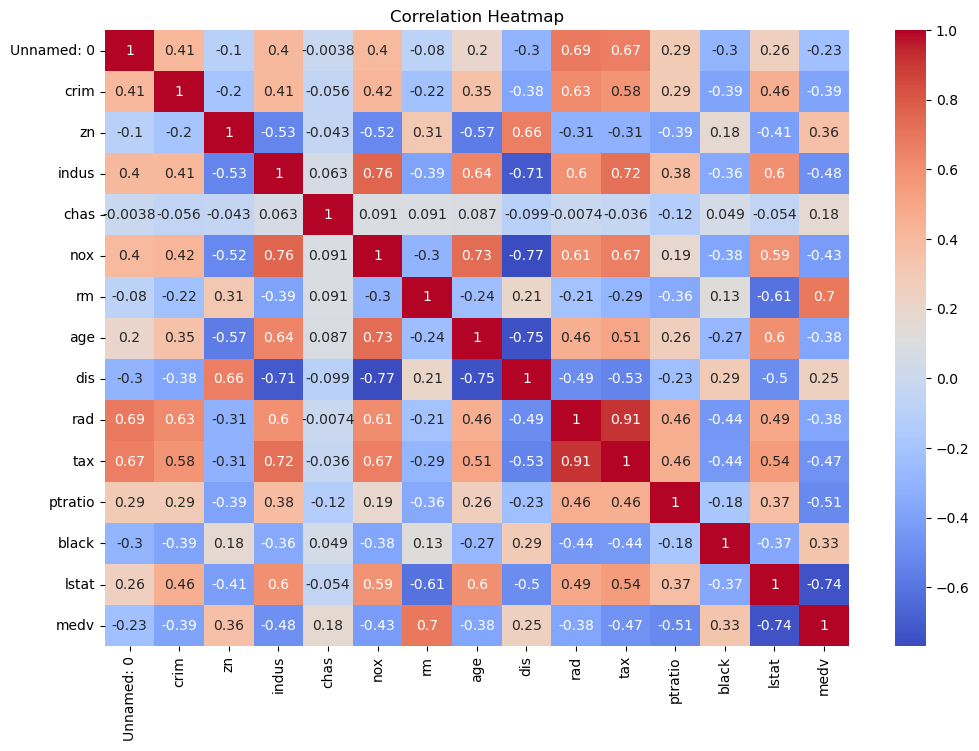

In [327]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [329]:
correlation_matrix = data.corr()
print("Correlation with medv:")
print(correlation_matrix['medv'].sort_values(ascending=False))

Correlation with medv:
medv          1.000000
rm            0.695360
zn            0.360445
black         0.333461
dis           0.249929
chas          0.175260
Unnamed: 0   -0.226604
age          -0.376955
rad          -0.381626
crim         -0.388305
nox          -0.427321
tax          -0.468536
indus        -0.483725
ptratio      -0.507787
lstat        -0.737663
Name: medv, dtype: float64


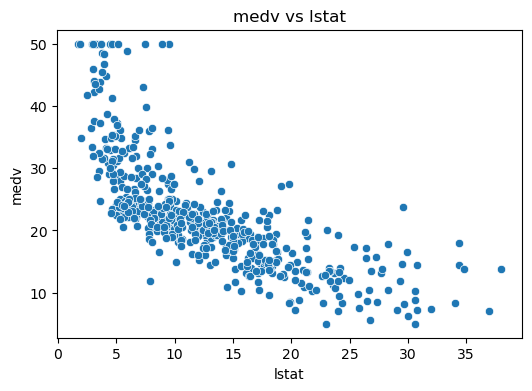

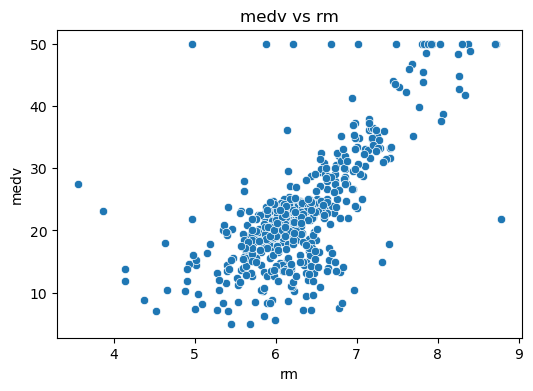

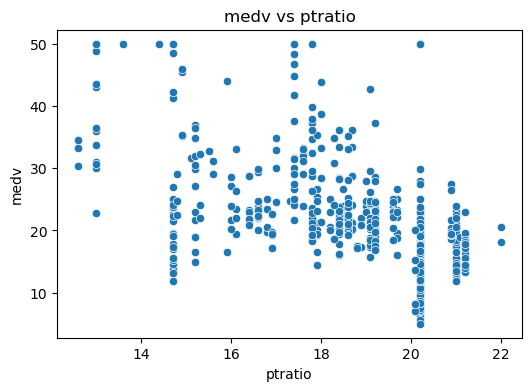

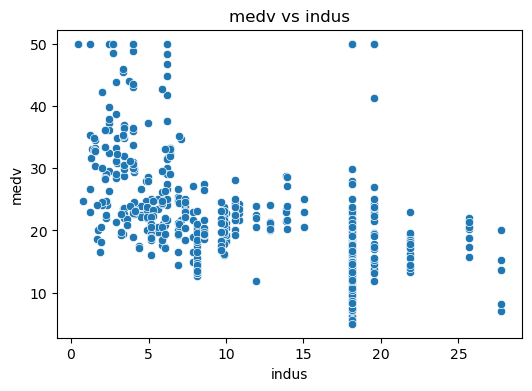

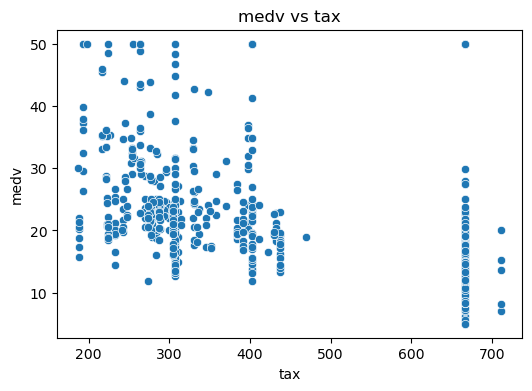

In [366]:
top_features = correlation_matrix['medv'].abs().sort_values(ascending=False).index[1:6]
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=feature, y='medv')
    plt.title(f'medv vs {feature}')
    plt.show()

In [332]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [335]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [370]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [372]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 27.891158402464637
R-squared: 0.6196683547405601


In [374]:
from sklearn.model_selection import cross_val_score

In [376]:
# Perform cross-validation
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores = -scores  # Convert to positive MSE

# Output results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation of accuracy:", np.std(cv_scores))

Cross-validation scores: [  8.34302757   9.83014072  10.17310338  43.53581298  27.35443015
  25.32040734  15.49833847 164.61803256  40.47206568  10.8502413 ]
Mean accuracy: 35.59956001567443
Standard deviation of accuracy: 44.69475242002821


To enhance the model, I recommend experimenting with hyperparameter tuning. It's also important to ensure the model's 
performance is stable across different data splits. Reducing the variation in results can make the model more consistent.